# Importando as bibliotecas

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Lendo os dados


In [53]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [54]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [55]:
correlacao = dados.corr().round(2)
correlacao

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


# Analise graficas

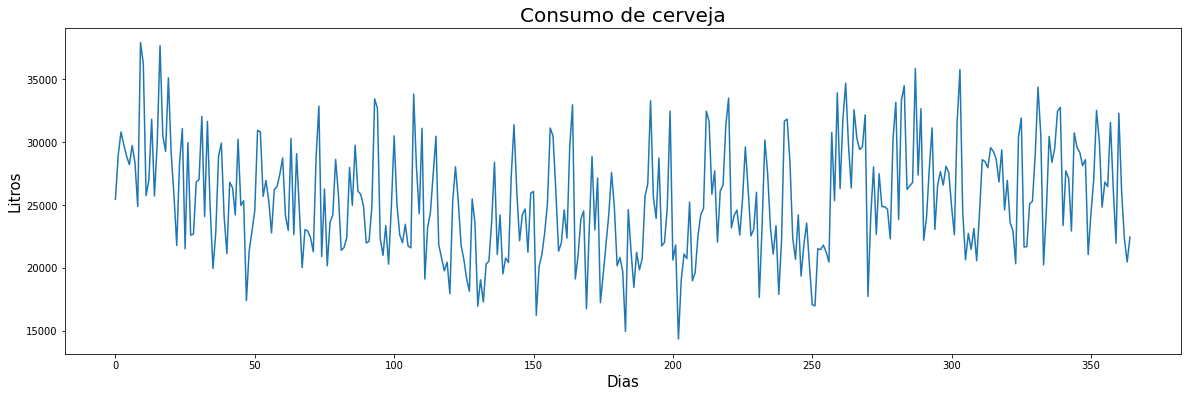

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)
ax.set_xlabel('Dias', fontsize=15)
ax = dados.consumo.plot()

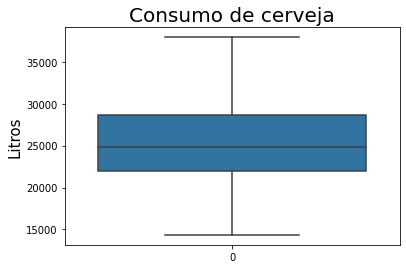

In [57]:
ax = sns.boxplot(data=dados['consumo'], orient='v')
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)
ax

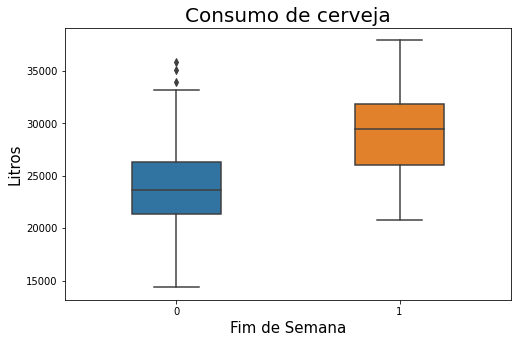

In [58]:
ax = sns.boxplot(x='fds', y='consumo', data=dados, orient='v', width=0.4)
ax.figure.set_size_inches(8, 5)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)
ax.set_xlabel('Fim de Semana', fontsize=15)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


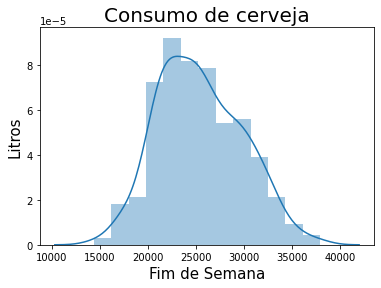

In [59]:
ax = sns.distplot(dados['consumo'])
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)
ax.set_xlabel('Fim de Semana', fontsize=15)
ax

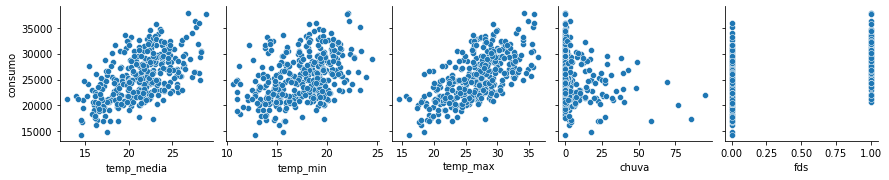

In [60]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'])

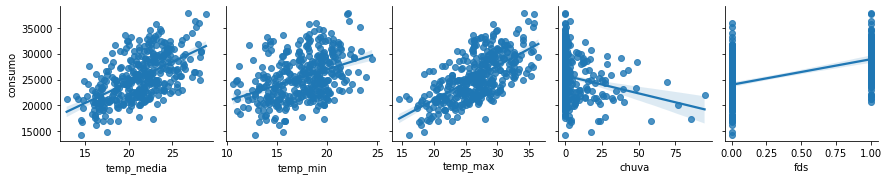

In [61]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'], kind='reg')

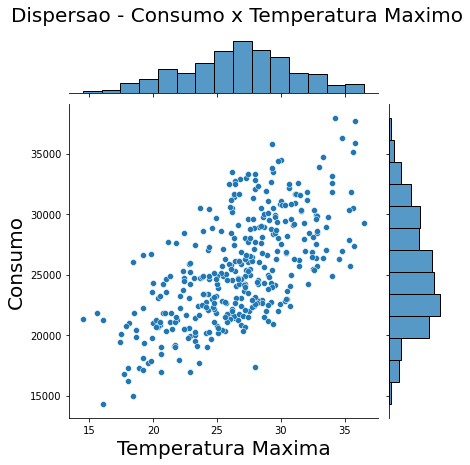

In [62]:
ax = sns.jointplot(data=dados, x='temp_max', y='consumo')
ax.fig.suptitle('Dispersao - Consumo x Temperatura Maximo', fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura Maxima','Consumo', fontsize=20)
ax

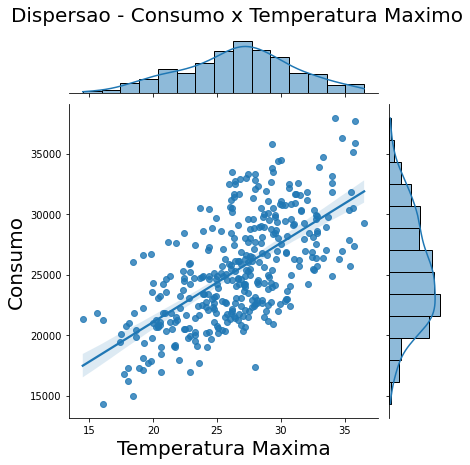

In [63]:
ax = sns.jointplot(data=dados, x='temp_max', y='consumo',kind='reg')
ax.fig.suptitle('Dispersao - Consumo x Temperatura Maximo', fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura Maxima','Consumo', fontsize=20)
ax

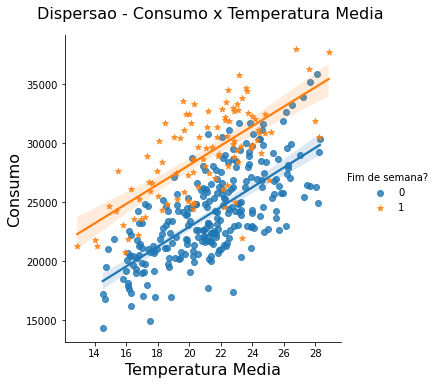

In [64]:
ax = sns.lmplot(data=dados, x='temp_media', y='consumo', hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Dispersao - Consumo x Temperatura Media', fontsize=16, y=1.05)
ax.set_xlabels('Temperatura Media', fontsize=16)
ax.set_ylabels('Consumo', fontsize=16)
ax.add_legend(title='Fim de semana?')
ax

# Usando regressão linear para prever o consumo

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
y = dados['consumo']
x = dados[['temp_max', 'fds', 'chuva']]


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

In [68]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [69]:
print(f'Coeficiente de formação R² {modelo.score(x_train, y_train):.2f}')

Coeficiente de formação R² 0.73


In [70]:
previsao_y = modelo.predict(x_test)

In [71]:
print(f'Coeficiente de formação R² {metrics.r2_score(y_test, previsao_y):.2f}')

Coeficiente de formação R² 0.69


In [72]:
index = ['intercepto', 'Temperatura Maxima', 'Fim de semana', 'Chuva']

In [73]:
efeito_variaveis = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['parametros'])
efeito_variaveis

,parametros
intercepto,5951.976339
Temperatura Maxima,684.736759
Fim de semana,5401.083339
Chuva,-60.782435


In [74]:
for i in range(len(efeito_variaveis.parametros)):
  if efeito_variaveis.index[i] == 'intercepto':
    pass
  else:
    print(f'Excluindo todas as outras variaveis 1 de aumento em {efeito_variaveis.index[i]} equivale a uma variação de {efeito_variaveis.parametros[i]:.2f} litros')

Excluindo todas as outras variaveis 1 de aumento em Temperatura Maxima equivale a uma variação de 684.74 litros
Excluindo todas as outras variaveis 1 de aumento em Fim de semana equivale a uma variação de 5401.08 litros
Excluindo todas as outras variaveis 1 de aumento em Chuva equivale a uma variação de -60.78 litros


# Analise grafica das previsões do modelo 

In [75]:
y_previsto_treino = modelo.predict(x_train)

Grefico de dispersão entre o valor estimado e o valor real

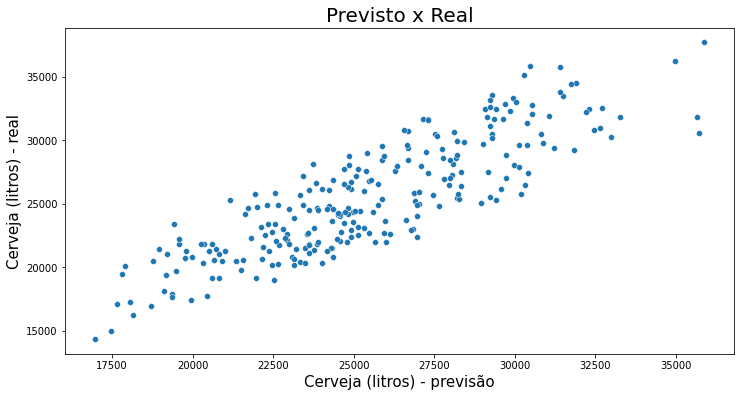

In [76]:
ax = sns.scatterplot(x=y_previsto_treino, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsto x Real', fontsize=20)
ax.set_xlabel('Cerveja (litros) - previsão', fontsize=15)
ax.set_ylabel('Cerveja (litros) - real', fontsize=15)
ax

In [77]:
residuo = y_train - y_previsto_treino

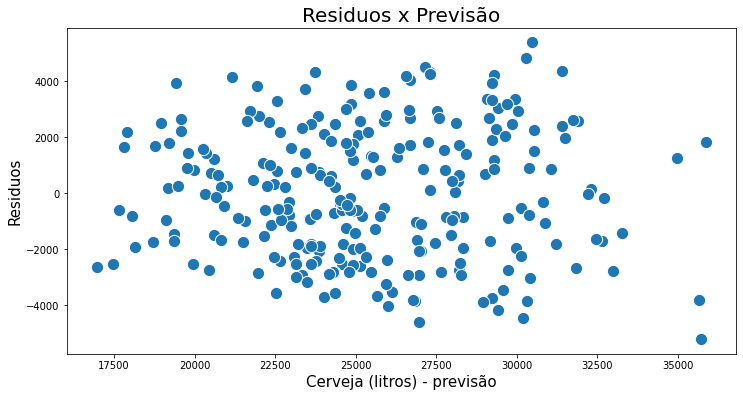

In [78]:
ax = sns.scatterplot(x=y_previsto_treino, y=residuo, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Residuos x Previsão', fontsize=20)
ax.set_xlabel('Cerveja (litros) - previsão', fontsize=15)
ax.set_ylabel('Residuos', fontsize=15)
ax

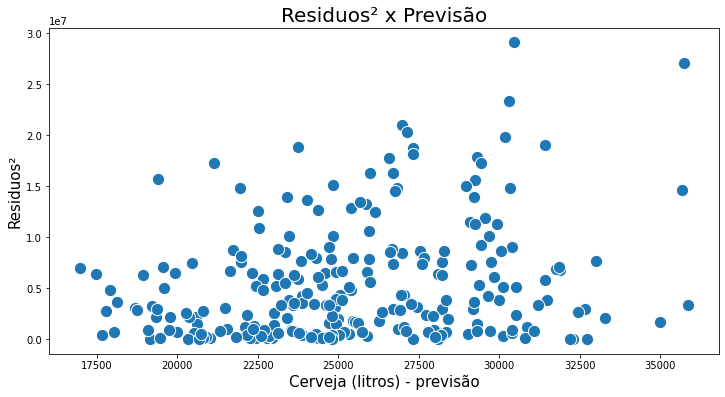

In [79]:
ax = sns.scatterplot(x=y_previsto_treino, y=residuo**2, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Residuos² x Previsão', fontsize=20)
ax.set_xlabel('Cerveja (litros) - previsão', fontsize=15)
ax.set_ylabel('Residuos²', fontsize=15)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


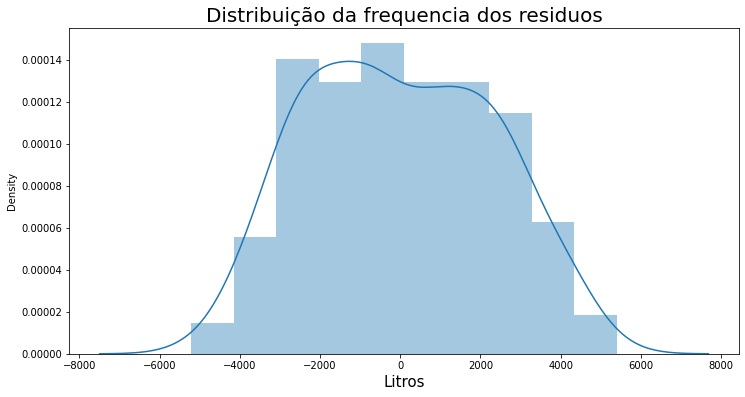

In [80]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da frequencia dos residuos', fontsize=20)
ax.set_xlabel('Litros', fontsize=15)
ax

Testando novo modelo com temperatura media ao invés de temperatura máxima


In [81]:
X2 = dados[['temp_media', 'chuva', 'fds']]
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [82]:
modelo_2 = LinearRegression()
modelo_2.fit(x2_train, y2_train)

LinearRegression()

In [83]:
print(f'Coeficiente de formação R² {modelo_2.score(x2_train, y2_train):.2f}')

Coeficiente de formação R² 0.66


In [84]:
previsao_2 = modelo_2.predict(x2_test)
print(f'R² {metrics.r2_score(previsao_2, y2_test)}')

R² 0.5602351028754027
